## Q1

In [1]:
import os.path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
tidy_data_path = './tidy-data'

In [180]:
files = os.listdir(tidy_data_path)
df = pd.read_csv(os.path.join(tidy_data_path,files[0]))

for e in files[1:]:
    if os.path.splitext(e)[1] == '.csv':
        df2 = pd.read_csv(os.path.join(tidy_data_path, e))
        df = pd.concat((df, df2), axis=0, join='inner')
        #print(e)
print(df.shape)

(219860, 17)


In [181]:
df.head()

,gamePk,eventIdx,eventTypeId,eventId,period,periodType,periodTime,dateTime,teamId,teamName,x,y,shotType,emptyNet,strength,shooter,goalie
0,2016020001,9,SHOT,8,1,REGULAR,01:11,2016-10-12T23:19:59Z,10,Toronto Maple Leafs,-77.0,5.0,Wrist Shot,NaN,NaN,Mitchell Marner,Craig Anderson
1,2016020001,16,SHOT,11,1,REGULAR,02:53,2016-10-12T23:21:41Z,9,Ottawa Senators,86.0,13.0,Wrist Shot,NaN,NaN,Chris Kelly,Frederik Andersen
2,2016020001,23,SHOT,15,1,REGULAR,04:01,2016-10-12T23:23:17Z,9,Ottawa Senators,23.0,-38.0,Wrist Shot,NaN,NaN,Cody Ceci,Frederik Andersen
3,2016020001,25,SHOT,16,1,REGULAR,04:46,2016-10-12T23:24:02Z,9,Ottawa Senators,33.0,-15.0,Slap Shot,NaN,NaN,Erik Karlsson,Frederik Andersen
4,2016020001,38,SHOT,24,1,REGULAR,06:46,2016-10-12T23:27:30Z,10,Toronto Maple Leafs,-34.0,28.0,Wrist Shot,NaN,NaN,Martin Marincin,Craig Anderson


In [182]:
raw_df = df.copy()

In [176]:
def shot_type_histogram(df, season):
    fig_size=(15, 10)
    # Filter dataframe by the season of interest
    df = df[df['gamePk'].apply(str).str.startswith(season)]
    #print(df_season.shape)
    fig = plt.figure(figsize=fig_size)
    
    # percentage of shots that are goals per type of shot
    goal_percentage = df[df['eventTypeId'] == 'GOAL']['shotType'].value_counts() / df['shotType'].value_counts()
    goal_percentage = goal_percentage.fillna(0)
    #print(goal_percentage)
    
    # All shots count plot
    ax1 = sns.countplot(
        x='shotType',
        data=df,
        order=goal_percentage.index,
        palette=['#7FB5D5'],
        label='shots'
    )

    for idx, p in enumerate(ax1.patches):
        height = p.get_height()
        ax1.text(p.get_x() + p.get_width() / 2., height + 10, f'{goal_percentage[idx] * 100 : .2f}%', size=12,
                 ha="center")

    # Goal count plot
    ax2 = sns.countplot(
        x='shotType',
        data=df[df['eventTypeId'] == 'GOAL'],
        order=goal_percentage.index,
        #order=df['shotType'].value_counts().index,
        palette=['#FFBC7C'],
        label='goals'
    )
    
    # Format the plot
    plt.legend(labels=['Shots', 'Goals'])
    plt.xticks(rotation=20)
    plt.ylabel('Count of shots')
    plt.xlabel('Type of shot')
    plt.title(
        f'Shot & Goal Count Per Type of Shot and percent of successful goals \n {season[0:4]} - {str(int(season)+1)[0:4]} season')
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(color='gray', linestyle='dashed')
    ax2.set_axisbelow(True)
    ax2.yaxis.grid(color='gray', linestyle='dashed')
    plt.show()

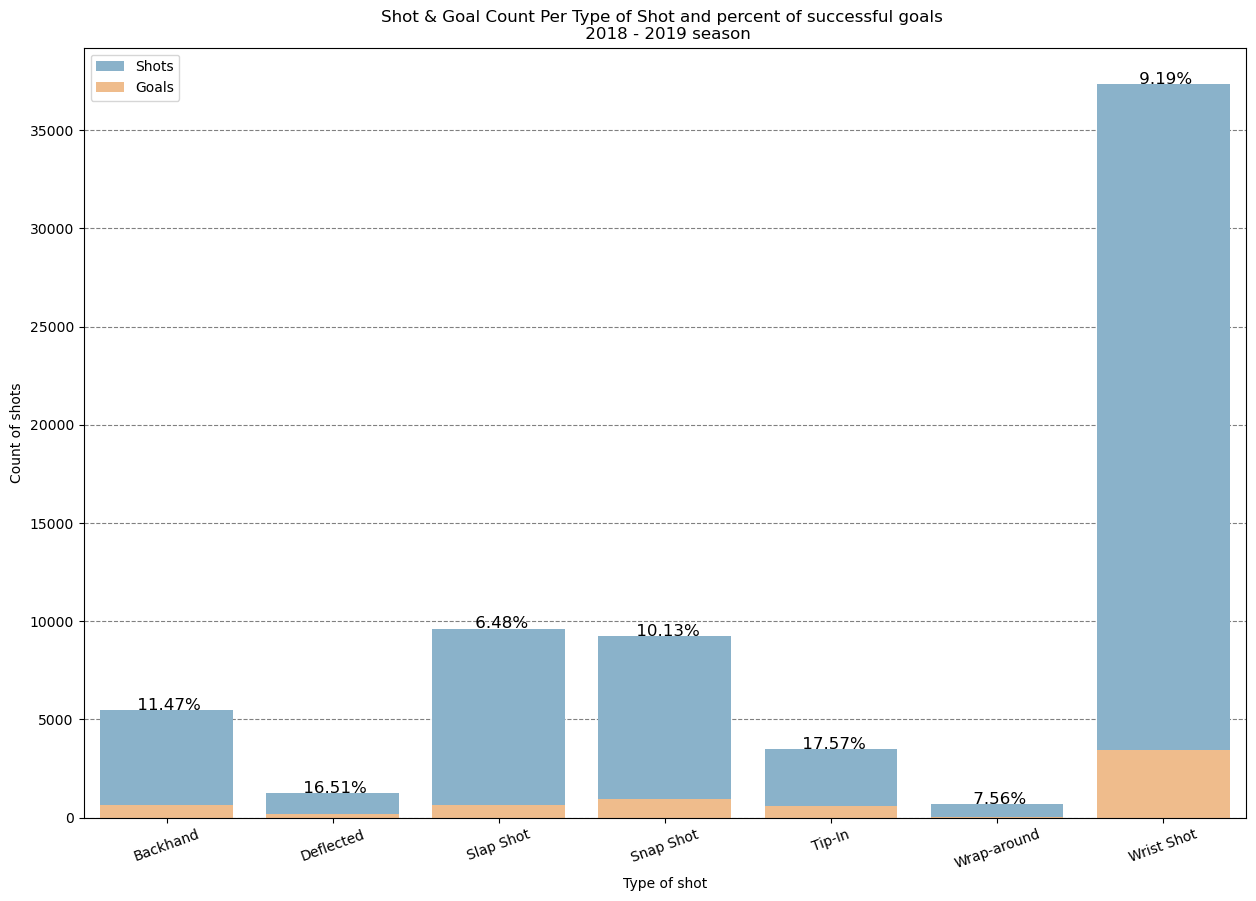

In [177]:
shot_type_histogram(raw_df, '2018')

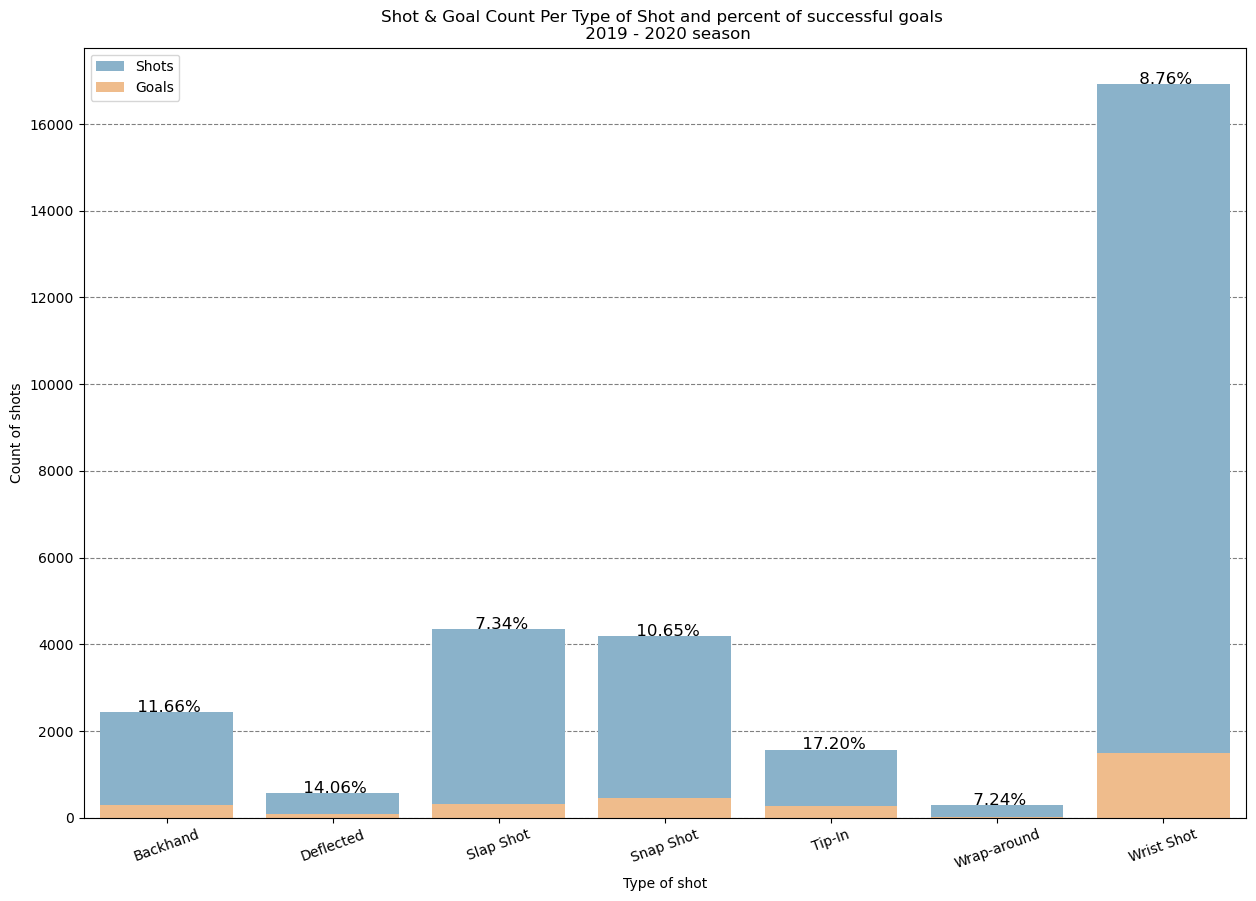

In [178]:
shot_type_histogram(raw_df, '2019')

In [ ]:
shot_type_histogram(raw_df, '2020')

## Discussion of Simple Visualizations Q1

The three graphs above are “Shot & Goal Count Per Type of Shot and percent of successful goals” for the three seasons of 2018-2019, 2019-2020, and 2020-2021. The number on the bar is the goal/shot ratio for that shot category. Taking the 2020-2021 season as an example, we can clearly see that **the most dangerous type of shot** (the highest percentage) is the **backhand** (11.66%). Also, **the most common type of shot** (with the highest bar) is the **wrist shot**. The most dangerous types of shots and the most common types of shots have been consistent over the past three years.

## Q3